In [1]:
import scanpy as sc
import drug2cell as d2c
import pandas as pd


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip



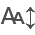

In [2]:
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [3]:
!pip install python-igraph louvain


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [4]:
adata = sc.read_h5ad("/Users/mennayoussef/Downloads/macrophage_subset.h5ad")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
adata

AnnData object with n_obs × n_vars = 16764 × 28335
    obs: 'Region', 'Sex', 'Age', 'Age_Range', 'Cell_or_Nuclei', 'Disease', 'Study', 'Study_Batch', 'Study_Type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mito', 'log1p_total_counts_Mito', 'pct_counts_Mito', 'stressScore', 'Indiv', 'n_genes', 'n_counts', 'Donor', 'batch', 'batch2', 'General_Region', 'Foetal Cluster', 'Adult Cluster', 'Cluster', 'Foetal Cell Type', 'Cell Type i', 'Cell Type ii', 'Cell Type', 'NCM Cell Type'
    var: 'gene_symbols-2', 'Mito-2', 'Mito-3', 'Mito-4', 'gene_symbols-5', 'Mito-5', 'gene_symbols-6', 'Mito-6', 'n_cells', 'Mito', 'gene_symbols', 'Mito-0', 'gene_symbols-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'log1p_mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'log1p_total_counts-0-0', 'n_cells-0-0', 'n_c

# Dissertation table on samples

In [6]:
df = adata.obs
df

Region     Sex  Age  \
HCAHeart7656536_CGGACTGAGACACTAA-1/1-0                 LA    Male  nan   
HCAHeart7656536_CAGAATCAGCTACCGC-1/1-0                 LA    Male  nan   
HCAHeart7656536_CACCAGGAGCGTGTCC-1/1-0                 LA    Male  nan   
HCAHeart7656536_CTAGTGAAGAGGTTGC-1/1-0                 LA    Male  nan   
HCAHeart7656536_AACCGCGCATAAAGGT-1/1-0                 LA    Male  nan   
...                                                   ...     ...  ...   
HCAHeartST10773169_HCAHeartST10781446_ACCCTGTTC...     RA  Female  nan   
HCAHeartST10773169_HCAHeartST10781446_AGGATGTCA...     RA  Female  nan   
HCAHeartST10773169_HCAHeartST10781446_TTGTTTGGT...     RA  Female  nan   
HCAHeartST10773169_HCAHeartST10781446_GCCCAAATC...     RA  Female  nan   
HCAHeartST10773169_HCAHeartST10781446_AGCTAGTTC...     RA  Female  nan   

                                                   Age_Range Cell_or_Nuclei  \
HCAHeart7656536_CGGACTGAGACACTAA-1/1-0                 55-60           Cell   
HCAHeart7656536_CAGAATCAGCTACCGC-1/1-0                 55-60           Cell   
HCAHeart7656536_CACCAGGAGCGTGTCC-1/1-0                 55-60           Cell   
HCAHeart7656536_CTAGTGAAGAGGTTGC-1/1-0                 55-60           Cell   
HCAHeart7656536_AACCGCGCATAAAGGT-1/1-0                 55-60           Cell   
...                                                      ...            ...   
HCAHeartST10773169_HCAHeartST10781446_ACCCTGTTC...     45-50         Nuclei   
HCAHeartST10773169_HCAHeartST10781446_AGGATGTCA...     45-50         Nuclei   
HCAHeartST10773169_HCAHeartST10781446_TTGTTTGGT...     45-50         Nuclei   
HCAHeartST10773169_HCAHeartST10781446_GCCCAAATC...     45-50         Nuclei   
HCAHeartST10773169_HCAHeartST10781446_AGCTAGTTC...     45-50         Nuclei   

                                                    Disease Study Study_Batch  \
HCAHeart7656536_CGGACTGAGACACTAA-1/1-0              Healthy  HCA2     HCA2_sc   
HCAHeart7656536_CAGAATCAGCTACCGC-1/1-0              Healthy  HCA2     HCA2_sc   
HCAHeart7656536_CACCAGGAGCGTGTCC-1/1-0              Healthy  HCA2     HCA2_sc   
HCAHeart7656536_CTAGTGAAGAGGTTGC-1/1-0              Healthy  HCA2     HCA2_sc   
HCAHeart7656536_AACCGCGCATAAAGGT-1/1-0              Healthy  HCA2     HCA2_sc   
...                                                     ...   ...         ...   
HCAHeartST10773169_HCAHeartST10781446_ACCCTGTTC...  Healthy  HCA2     HCA2_sn   
HCAHeartST10773169_HCAHeartST10781446_AGGATGTCA...  Healthy  HCA2     HCA2_sn   
HCAHeartST10773169_HCAHeartST10781446_TTGTTTGGT...  Healthy  HCA2     HCA2_sn   
HCAHeartST10773169_HCAHeartST10781446_GCCCAAATC...  Healthy  HCA2     HCA2_sn   
HCAHeartST10773169_HCAHeartST10781446_AGCTAGTTC...  Healthy  HCA2     HCA2_sn   

                                                   Study_Type  \
HCAHeart7656536_CGGACTGAGACACTAA-1/1-0                HCA2_sc   
HCAHeart7656536_CAGAATCAGCTACCGC-1/1-0                HCA2_sc   
HCAHeart7656536_CACCAGGAGCGTGTCC-1/1-0                HCA2_sc   
HCAHeart7656536_CTAGTGAAGAGGTTGC-1/1-0                HCA2_sc   
HCAHeart7656536_AACCGCGCATAAAGGT-1/1-0                HCA2_sc   
...                                                       ...   
HCAHeartST10773169_HCAHeartST10781446_ACCCTGTTC...    HCA2_sn   
HCAHeartST10773169_HCAHeartST10781446_AGGATGTCA...    HCA2_sn   
HCAHeartST10773169_HCAHeartST10781446_TTGTTTGGT...    HCA2_sn   
HCAHeartST10773169_HCAHeartST10781446_GCCCAAATC...    HCA2_sn   
HCAHeartST10773169_HCAHeartST10781446_AGCTAGTTC...    HCA2_sn   

                                                    n_genes_by_counts  ...  \
HCAHeart7656536_CGGACTGAGACACTAA-1/1-0                           4070  ...   
HCAHeart7656536_CAGAATCAGCTACCGC-1/1-0                           3188  ...   
HCAHeart7656536_CACCAGGAGCGTGTCC-1/1-0                           3026  ...   
HCAHeart7656536_CTAGTGAAGAGGTTGC-1/1-0                           2941  ...   
HCAHeart7656536_AACCGCGCATAAAGGT-1/1-0                           2973

In [7]:
selected_cols = ["Sex", "Disease", "Study", "General_Region", "Donor"]
new_df = df[selected_cols]
new_df

Sex  Disease Study  \
HCAHeart7656536_CGGACTGAGACACTAA-1/1-0                Male  Healthy  HCA2   
HCAHeart7656536_CAGAATCAGCTACCGC-1/1-0                Male  Healthy  HCA2   
HCAHeart7656536_CACCAGGAGCGTGTCC-1/1-0                Male  Healthy  HCA2   
HCAHeart7656536_CTAGTGAAGAGGTTGC-1/1-0                Male  Healthy  HCA2   
HCAHeart7656536_AACCGCGCATAAAGGT-1/1-0                Male  Healthy  HCA2   
...                                                    ...      ...   ...   
HCAHeartST10773169_HCAHeartST10781446_ACCCTGTTC...  Female  Healthy  HCA2   
HCAHeartST10773169_HCAHeartST10781446_AGGATGTCA...  Female  Healthy  HCA2   
HCAHeartST10773169_HCAHeartST10781446_TTGTTTGGT...  Female  Healthy  HCA2   
HCAHeartST10773169_HCAHeartST10781446_GCCCAAATC...  Female  Healthy  HCA2   
HCAHeartST10773169_HCAHeartST10781446_AGCTAGTTC...  Female  Healthy  HCA2   

                                                   General_Region Donor  
HCAHeart7656536_CGGACTGAGACACTAA-1/1-0                     Atrial    D3  
HCAHeart7656536_CAGAATCAGCTACCGC-1/1-0                     Atrial    D3  
HCAHeart7656536_CACCAGGAGCGTGTCC-1/1-0                     Atrial    D3  
HCAHeart7656536_CTAGTGAAGAGGTTGC-1/1-0                     Atrial    D3  
HCAHeart7656536_AACCGCGCATAAAGGT-1/1-0                     Atrial    D3  
...                                                           ...   ...  
HCAHeartST10773169_HCAHeartST10781446_ACCCTGTTC...         Atrial   AH1  
HCAHeartST10773169_HCAHeartST10781446_AGGATGTCA...         Atrial   AH1  
HCAHeartST10773169_HCAHeartST10781446_TTGTTTGGT...         Atrial   AH1  
HCAHeartST10773169_HCAHeartST10781446_GCCCAAATC...         Atrial   AH1  
HCAHeartST10773169_HCAHeartST10781446_AGCTAGTTC...         Atrial   AH1  

[16764 rows x 5 columns]

In [8]:
grouped_df = new_df.groupby("Donor").agg(lambda x: list(x.unique()))
grouped_df

/var/folders/2f/yz7m9qg90v7802vshvdt7grr0000gn/T/ipykernel_28227/1222659367.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = new_df.groupby("Donor").agg(lambda x: list(x.unique()))


Sex    Disease     Study General_Region
Donor                                              
AH1    [Female]  [Healthy]    [HCA2]       [Atrial]
D1     [Female]  [Healthy]    [HCA2]       [Atrial]
D2       [Male]  [Healthy]    [HCA2]       [Atrial]
D3       [Male]  [Healthy]    [HCA2]       [Atrial]
D4     [Female]  [Healthy]    [HCA2]       [Atrial]
D5     [Female]  [Healthy]    [HCA2]       [Atrial]
D6       [Male]  [Healthy]    [HCA2]       [Atrial]
D7       [Male]  [Healthy]    [HCA2]       [Atrial]
D8       [Male]  [Healthy]    [HCA2]       [Atrial]
D11    [Female]  [Healthy]    [HCA2]       [Atrial]
H2       [Male]  [Healthy]    [HCA2]       [Atrial]
H3       [Male]  [Healthy]    [HCA2]       [Atrial]
H4       [Male]  [Healthy]    [HCA2]       [Atrial]
H5     [Female]  [Healthy]    [HCA2]       [Atrial]
H6     [Female]  [Healthy]    [HCA2]       [Atrial]
H7     [Female]  [Healthy]    [HCA2]       [Atrial]
P1221  [Female]  [Healthy]  [Tucker]       [Atrial]
P1600  [Female]  [Healthy]  [Tucker]       [Atrial]
P1666    [Male]  [Healthy]  [Tucker]       [Atrial]
P1681    [Male]  [Healthy]  [Tucker]       [Atrial]
P1702    [Male]  [Healthy]  [Tucker]       [Atrial]
P1708  [Female]  [Healthy]  [Tucker]       [Atrial]
P1723  [Female]  [Healthy]  [Tucker]       [Atrial]

In [11]:
# Save DataFrame to an Excel file
grouped_df.to_excel("/Users/mennayoussef/Downloads/sampels_table_healthy.xlsx", index=True)

In [7]:
# Load your AnnData object (assuming it's already loaded as `adata`)
sex_counts = adata.obs['Sex'].value_counts()

# Print the counts
print(sex_counts)


Sex
Male      10127
Female     6637
Name: count, dtype: int64


In [31]:
# Recompute PCA, neighbors, and UMAP
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)  # <== This recomputes UMAP layout

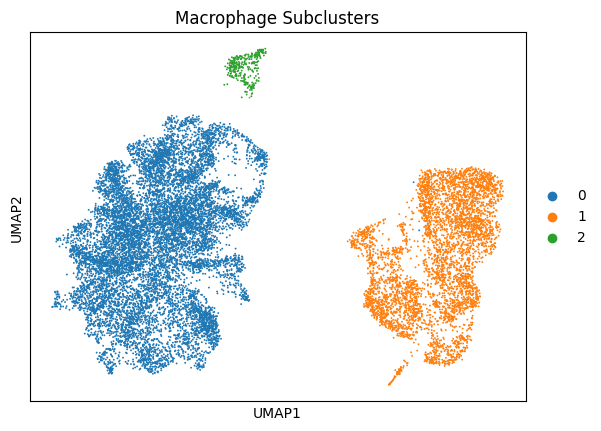

In [32]:
sc.tl.louvain(adata, resolution=0.1)  # Adjust resolution for granularity
sc.pl.umap(adata, color="louvain", title="Macrophage Subclusters")

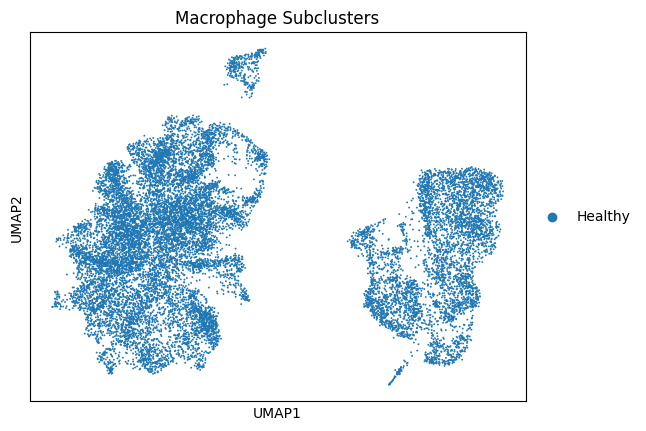

In [33]:
sc.pl.umap(adata, color="Disease", title="Macrophage Subclusters")

In [34]:

# Group by Louvain clusters and gender, then count cells
gender_cluster_counts = adata.obs.groupby(["louvain", "Sex"]).size().unstack(fill_value=0)

# Calculate proportions per cluster
gender_cluster_proportions = gender_cluster_counts.div(gender_cluster_counts.sum(axis=1), axis=0)

# Display the table
print(gender_cluster_proportions)


Sex        Female      Male
louvain                    
0        0.484153  0.515847
1        0.137292  0.862708
2        0.989899  0.010101


/var/folders/2f/yz7m9qg90v7802vshvdt7grr0000gn/T/ipykernel_64863/2154510824.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_cluster_counts = adata.obs.groupby(["louvain", "Sex"]).size().unstack(fill_value=0)


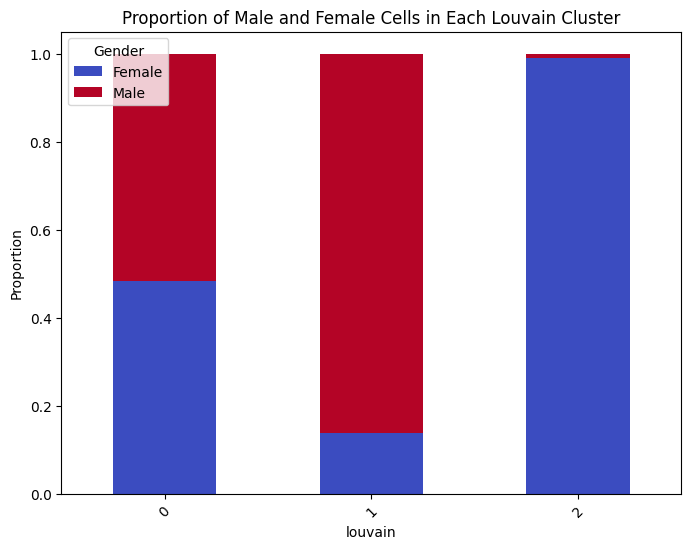

In [35]:
import matplotlib.pyplot as plt

# Plot stacked bar chart
gender_cluster_proportions.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="coolwarm")
plt.ylabel("Proportion")
plt.title("Proportion of Male and Female Cells in Each Louvain Cluster")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()

louvain         0         1         2
Sex                                  
Female   0.858520  0.097182  0.044297
Male     0.599487  0.400217  0.000296


/var/folders/2f/yz7m9qg90v7802vshvdt7grr0000gn/T/ipykernel_64863/1818514267.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_cluster_counts = adata.obs.groupby(["Sex", "louvain"]).size().unstack(fill_value=0)


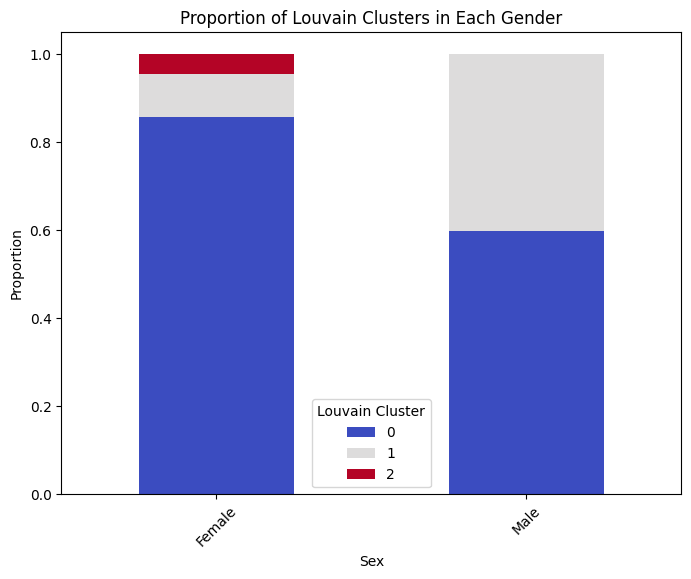

In [36]:
# Group by gender and Louvain clusters, then count cells
gender_cluster_counts = adata.obs.groupby(["Sex", "louvain"]).size().unstack(fill_value=0)

# Calculate proportions per gender
gender_cluster_proportions = gender_cluster_counts.div(gender_cluster_counts.sum(axis=1), axis=0)

# Display the table
print(gender_cluster_proportions)

import matplotlib.pyplot as plt

# Plot stacked bar chart with gender on x-axis
gender_cluster_proportions.plot(kind="bar", stacked=True, figsize=(8, 6), colormap="coolwarm")
plt.ylabel("Proportion")
plt.title("Proportion of Louvain Clusters in Each Gender")
plt.xticks(rotation=45)
plt.legend(title="Louvain Cluster")
plt.show()


In [56]:
# Run differential expression analysis
sc.tl.rank_genes_groups(adata, groupby="louvain", method="wilcoxon")

# Convert results into a DataFrame
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names  # Get cluster names

# Extract top 10 marker genes per cluster
top_genes = {cluster: result["names"][cluster][10:20] for cluster in groups}

# Convert to DataFrame
top_genes_df = pd.DataFrame(top_genes)
top_genes_df

0       1        2
0     ZEB2   RPL13   MT-ND5
1     RBPJ   RPLP1   ANKHD1
2  STARD13   RPS14    RPL17
3    MAML2  S100A6    FNIP1
4    ELMO1   RPS15    MS4A7
5   FRMD4B   RPS27  ATP6V0C
6   SLC9A9   RPL39     CTSB
7    DOCK4   RPS19  RNASET2
8      FTX  RPL18A     FGL2
9    TRPS1    MYL6     TLR2

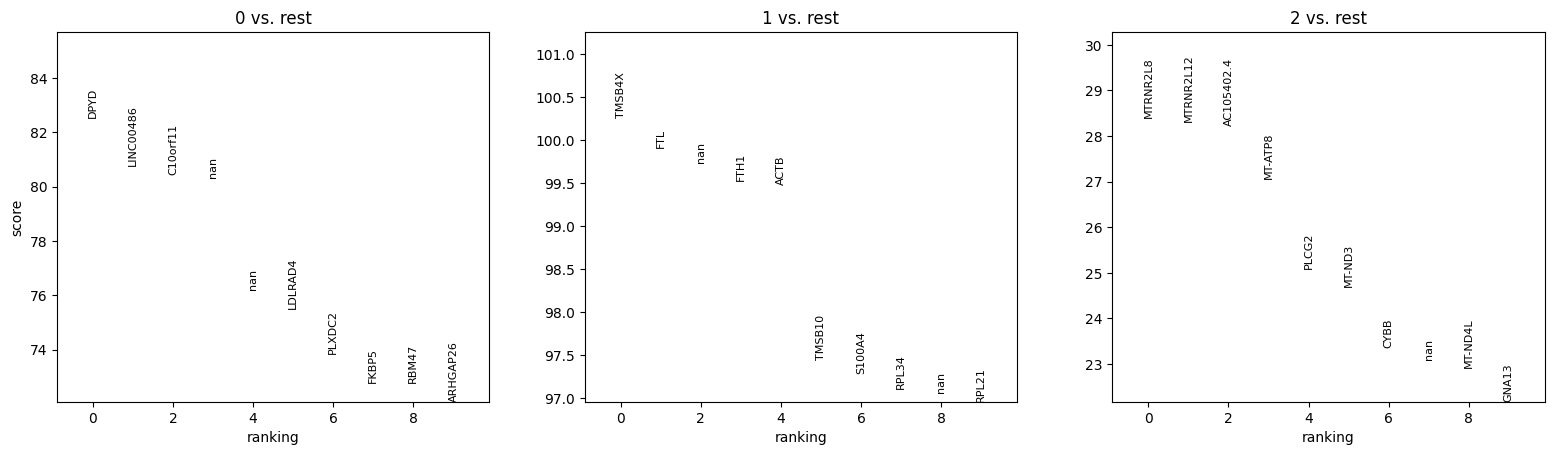

In [38]:

#sc.tl.rank_genes_groups(adata, groupby="louvain", method="wilcoxon")  
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)  # Visualize top 10 markers


In [14]:
d2c.score(adata, use_raw=True)

In [15]:
adata.uns["drug2cell"]

AnnData object with n_obs × n_vars = 16764 × 2311
    obs: 'Region', 'Sex', 'Age', 'Age_Range', 'Cell_or_Nuclei', 'Disease', 'Study', 'Study_Batch', 'Study_Type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mito', 'log1p_total_counts_Mito', 'pct_counts_Mito', 'stressScore', 'Indiv', 'n_genes', 'n_counts', 'Donor', 'batch', 'batch2', 'General_Region', 'Foetal Cluster', 'Adult Cluster', 'Cluster', 'Foetal Cell Type', 'Cell Type i', 'Cell Type ii', 'Cell Type', 'NCM Cell Type', 'louvain'
    var: 'genes', 'all_genes'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

In [16]:
adata.uns["drug2cell"].var

genes  \
CHEMBL1615779|IOBENGUANE I 131                                                                 SLC6A2   
CHEMBL3989924|LUTETIUM DOTATATE LU-177                                              SSTR1,SSTR5,SSTR2   
CHEMBL2108709|COLLAGENASE CLOSTRIDIUM HISTOLYTICUM  COL11A1,COL5A3,COL4A4,COL1A1,COL5A1,COL4A2,COL...   
CHEMBL256997|ATALUREN                               RPS20,RPL18,RPL31,RPS5,RPL6,RPLP0,RPL3,RPS16,R...   
CHEMBL1201556|BECAPLERMIN                                                               PDGFRB,PDGFRA   
...                                                                                               ...   
CHEMBL2068724|ACAMPROSATE CALCIUM                   GABRA3,GABRA1,GABRP,GABRE,GRIN2D,GABRA4,GABRG2...   
CHEMBL1562610|MECLOFENAMATE SODIUM                                            PTGS2,PTGS1,GMNN,CYP2C9   
CHEMBL1200467|HYDROXYZINE PAMOATE                        KDM4A,HSD17B10,POLI,POLK,PLK1,FEN1,POLH,HRH1   
CHEMBL454|BUTALBITAL                                GABRA3,GABRA1,GABRP,GABRE,GABRA4,GABRG2,GABRA6...   
CHEMBL2105741|TRAMETINIB DIMETHYL SULFOXIDE                                             MAP2K2,MAP2K1   

                                                                                            all_genes  
CHEMBL1615779|IOBENGUANE I 131                                                                 SLC6A2  
CHEMBL3989924|LUTETIUM DOTATATE LU-177                                  SSTR3,SSTR2,SSTR1,SSTR5,SSTR4  
CHEMBL2108709|COLLAGENASE CLOSTRIDIUM HISTOLYTICUM  COL1A1,COL5A3,COL4A3,COL6A5,COL6A1,COL15A1,COL...  
CHEMBL256997|ATALUREN                               RPS24,RPS11,RPS17,RPS14,RPL9P8,RPL18A,RPS27A,R...  
CHEMBL1201556|BECAPLERMIN                                                               PDGFRB,PDGFRA  
...                                                                                               ...  
CHEMBL2068724|ACAMPROSATE CALCIUM                   GABRB2,GABRA1,GABRB1,GRIN2C,GRIN2D,GRIN2A,GABR...  
CHEMBL1562610|MECLOFENAMATE SODIUM                                      ALOX5,GMNN,PTGS1,CYP2C9,PTGS2  
CHEMBL1200467|HYDROXYZINE PAMOATE                   POLI,EHMT2,FEN1,HRH1,HSD17B10,KDM4A,PLK1,POLH,...  
CHEMBL454|BUTALBITAL                                GABRE,GABRG3,GABRB2,GABRG2,GABRB1,GABRA3,GABRA...  
CHEMBL2105741|TRAMETINIB DIMETHYL SULFOXIDE                                             MAP2K1,MAP2K2  

[2311 rows x 2 columns]

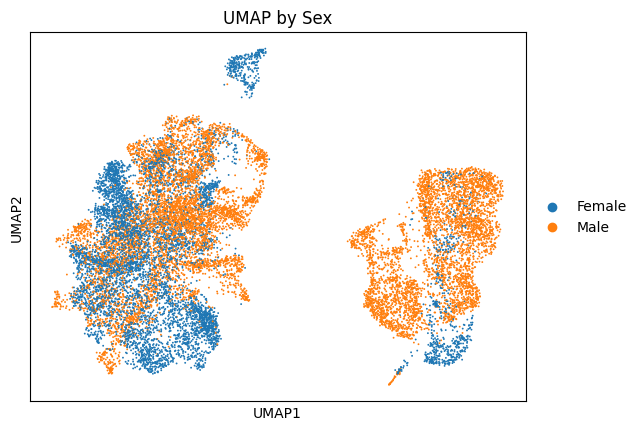

In [17]:
sc.pl.umap(adata, color="Sex", title="UMAP by Sex")

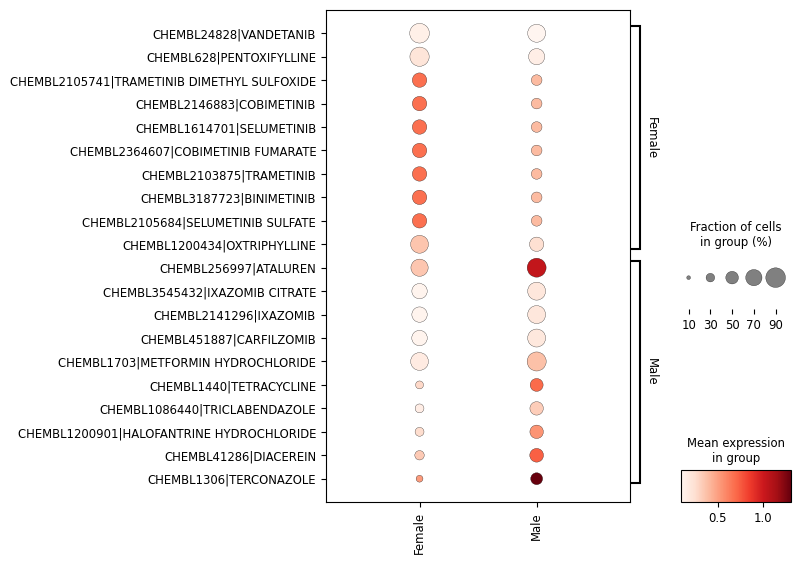

In [18]:
sc.tl.rank_genes_groups(adata.uns['drug2cell'], method="wilcoxon", groupby="Sex")
sc.pl.rank_genes_groups_dotplot(adata.uns['drug2cell'], swap_axes=True, dendrogram=False, n_genes=10, figsize=(6,6))


In [19]:
sc.get.rank_genes_groups_df(adata.uns['drug2cell'], group = 'Male')

names     scores  logfoldchanges  \
0                  CHEMBL256997|ATALUREN  34.104752        2.102783   
1         CHEMBL3545432|IXAZOMIB CITRATE  33.275936        0.916710   
2                 CHEMBL2141296|IXAZOMIB  33.275936        0.916710   
3               CHEMBL451887|CARFILZOMIB  33.039997        0.899417   
4     CHEMBL1703|METFORMIN HYDROCHLORIDE  32.666584        1.303572   
...                                  ...        ...             ...   
2306           CHEMBL1614701|SELUMETINIB -28.585882       -0.995379   
2307  CHEMBL2364607|COBIMETINIB FUMARATE -28.585882       -0.995379   
2308   CHEMBL2105684|SELUMETINIB SULFATE -28.585882       -0.995379   
2309            CHEMBL628|PENTOXIFYLLINE -29.504175       -0.533238   
2310              CHEMBL24828|VANDETANIB -30.738180       -0.550971   

              pvals      pvals_adj  
0     6.271819e-255  1.449417e-251  
1     8.608347e-243  6.631297e-240  
2     8.608347e-243  6.631297e-240  
3     2.165760e-239  1.251268e-236  
4     4.659811e-234  2.153765e-231  
...             ...            ...  
2306  1.006517e-179  1.011331e-177  
2307  1.006517e-179  1.011331e-177  
2308  1.006517e-179  1.011331e-177  
2309  2.544998e-191  4.524223e-189  
2310  1.759234e-207  5.081987e-205  

[2311 rows x 5 columns]

In [20]:
sc.get.rank_genes_groups_df(adata.uns['drug2cell'], group = 'Female')

names     scores  logfoldchanges  \
0                          CHEMBL24828|VANDETANIB  30.738180        0.550971   
1                        CHEMBL628|PENTOXIFYLLINE  29.504175        0.533238   
2     CHEMBL2105741|TRAMETINIB DIMETHYL SULFOXIDE  28.585882        0.995379   
3                       CHEMBL2146883|COBIMETINIB  28.585882        0.995379   
4                       CHEMBL1614701|SELUMETINIB  28.585882        0.995379   
...                                           ...        ...             ...   
2306           CHEMBL1703|METFORMIN HYDROCHLORIDE -32.666584       -1.303572   
2307                     CHEMBL451887|CARFILZOMIB -33.039997       -0.899417   
2308                       CHEMBL2141296|IXAZOMIB -33.275936       -0.916710   
2309               CHEMBL3545432|IXAZOMIB CITRATE -33.275936       -0.916710   
2310                        CHEMBL256997|ATALUREN -34.104752       -2.102783   

              pvals      pvals_adj  
0     1.759234e-207  5.081987e-205  
1     2.544998e-191  4.524223e-189  
2     1.006517e-179  1.011331e-177  
3     1.006517e-179  1.011331e-177  
4     1.006517e-179  1.011331e-177  
...             ...            ...  
2306  4.659811e-234  2.153765e-231  
2307  2.165760e-239  1.251268e-236  
2308  8.608347e-243  6.631297e-240  
2309  8.608347e-243  6.631297e-240  
2310  6.271819e-255  1.449417e-251  

[2311 rows x 5 columns]

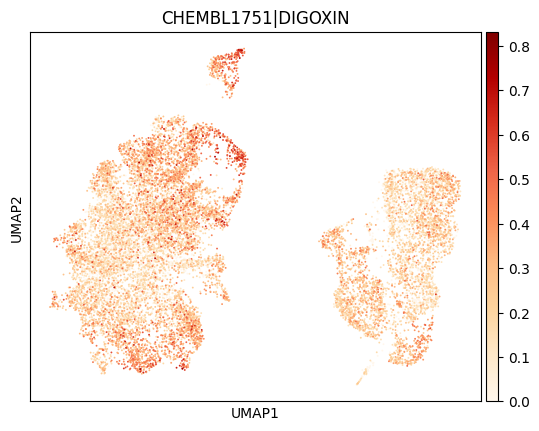

In [25]:
sc.pl.umap(adata.uns['drug2cell'], color="CHEMBL1751|DIGOXIN", color_map="OrRd")

In [40]:
import gprofiler
from gprofiler import GProfiler

# Initialize g:Profiler
gp = GProfiler(return_dataframe=True)

# Define gene lists for each subcluster
subclusters = {
    "Cluster 0": ["DPYD", "LINC00486", "C10orf11", "LDLRAD4", "PLXDC2", "FKBP5", "RBM47", "ARHGAP26"],
    "Cluster 1": ["TMSB4X", "FTL", "FTH1", "ACTB", "TMSB10", "S100A4", "RPL34", "RPL21"],
    "Cluster 2": ["MTRNR2L8", "MTRNR2L12", "AC105402.4", "MT-ATP8", "PLCG2", "MT-ND3", "CYBB", "MT-ND4L", "GNA13"]
}

# Run g:Profiler for each subcluster
results = {}
for cluster, genes in subclusters.items():
    results[cluster] = gp.profile(organism="hsapiens", query=genes)

# Display results for Cluster 0 as an example
print(results["Cluster 0"])


  source      native                                              name  \
0     WP   WP:WP3945                TYROBP causal network in microglia   
1  GO:MF  GO:0002058                                    uracil binding   
2  GO:MF  GO:0002061                     pyrimidine nucleobase binding   
3  GO:MF  GO:0017113  dihydropyrimidine dehydrogenase (NADP+) activity   

    p_value  significant                                        description  \
0  0.023219         True                 TYROBP causal network in microglia   
1  0.049847         True                     "Binding to uracil." [GOC:hjd]   
2  0.049847         True  "Binding to a pyrimidine nucleobase, an organi...   
3  0.049847         True  "Catalysis of the reaction: 5,6-dihydrouracil ...   

   term_size  query_size  intersection_size  effective_domain_size  precision  \
0         60           4                  2                   8722   0.500000   
1          1           6                  1                  20196   0.

In [44]:
print(df_all.columns)


Index(['Cluster', 'description', 'effective_domain_size', 'goshv',
       'intersection_size', 'intersections', 'name', 'native', 'p_value',
       'parents', 'precision', 'query', 'query_size', 'recall', 'significant',
       'source', 'term_size', 'source_order', 'group_id'],
      dtype='object')
